# Start



In [ ]:
from data_process import *
from utility import *
from model import *
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.transforms import transforms

In [ ]:
# data process: there we only augment the train and validating data, instead of test data
train_x, train_y, test_x, test_y = get_data('./recognition.csv')

In [ ]:
mu, std = calculate_mean_std(train_x)

In [ ]:
# hyper parameters:
batch_size = 64
num_workers = 4

basic_trans = transforms.Compose([
    transforms.CenterCrop(40),
    transforms.ToTensor(),
])

train_set = custom_dataset(train_x, train_y, input_transform=basic_trans)
test_train_set = custom_dataset(train_x, train_y, input_transform=basic_trans)
test_set = custom_dataset(test_x, test_y, input_transform=basic_trans)
train_loader = DataLoader(train_set, shuffle=True, batch_size=batch_size, num_workers=num_workers)
test_train_loader = DataLoader(test_train_set, shuffle=False, batch_size=batch_size, num_workers=num_workers)
test_loader = DataLoader(test_set, shuffle=False, batch_size=batch_size, num_workers=num_workers)

In [46]:
basic_net = basic_cls()
# basic_net = alter_cls([1, 1, 1, 1])

In [47]:
torch.backends.cudnn.benchmark = True
basic_net = basic_net.to(device)

In [48]:
total_acc_list, total_loss_list = [], []

In [53]:
# hyper parameters, easy for changing
mom = .9
wd = 1e-6
lr = 1e-3
max_epoch = 5
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [54]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.NAdam(params=basic_net.parameters(), lr=lr, weight_decay=wd)

epoch: 1
train loss: 0.001276, train accuracy: 0.973318
epoch: 2
train loss: 0.001296, train accuracy: 0.973005
epoch: 3
train loss: 0.001068, train accuracy: 0.978543
epoch: 4
train loss: 0.001152, train accuracy: 0.976488
epoch: 5
train loss: 0.001058, train accuracy: 0.977324


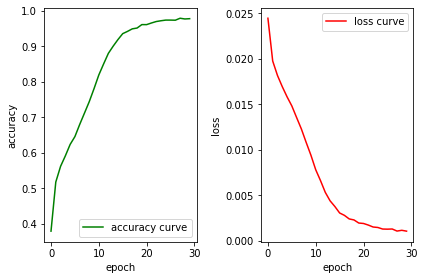

In [56]:
train_acc_list, train_loss_list = train(basic_net, criterion, optimizer, train_loader, device, max_epoch)
total_acc_list.extend(train_acc_list)
total_loss_list.extend(train_loss_list)
draw_accuracy_loss_curve(total_acc_list, total_loss_list)

train accuracy: 0.986590


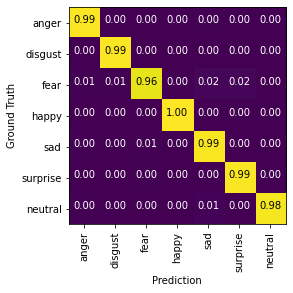

In [57]:
# test on train set
train_pre = test2pre(basic_net, test_train_loader, device)
train_acc = cal_acc(train_pre, train_y)
print('train accuracy: {:.6f}'.format(train_acc))
draw_confusion_matrix(train_pre, train_y, in_probability=True)

test accuracy: 0.633603


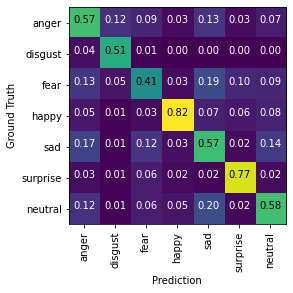

********************
evaluating indicators are as below:
BER: 0.228660
MCC: 0.556334
sensitivity: 0.605379
specificity: 0.937301
recall: 0.605379
precision: 0.635991
F1: 0.616478
auROC: 0.771340
auPRC: 0.450592
kappa: 0.556750
hamming: 0.366397
********************


In [58]:
test_pre = test2pre(basic_net, test_loader, device)
test_acc = cal_acc(test_pre, test_y)
print('test accuracy: {:.6f}'.format(test_acc))
draw_confusion_matrix(test_pre, test_y, in_probability=True)
test_eval = cal_all_eval(test_pre, test_y)
print_eval(test_eval)